## Praktikum 6 Liebenow

### * Vorbereitung der Funktionen:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
shift=3
endpoint=8

In [3]:
x_2 = np.zeros(shift+endpoint)
x_2[0:4]=2

In [4]:
x_1=np.zeros(shift+endpoint)
x_1[0]=3
x_1[1]=2
x_1[2]=1

### 2.1) Darstellung der Funktionen:

* Umwandlung in den Parameter "m" der die "n-Werte" shiftet um negative Werte der n-Achse zu ermöglichen
* Plot der Funktion x1(n) gemäß Aufgabenstellung

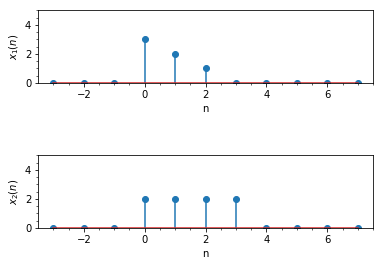

In [50]:

n=np.arange(-shift,8)
x_1_m=np.roll(x_1,shift)
x_2_m=np.roll(x_2,shift)
plt.subplot(211)
plt.ylim(0,5)
plt.ylabel("$x_1(n)$")
plt.xlabel("n")
plt.minorticks_on()
plt.stem(n,x_1_m)
plt.subplot(212)
plt.ylim(0,5)
plt.ylabel("$x_2(n)$")
plt.xlabel("n")
plt.minorticks_on()
plt.subplots_adjust(hspace=1)
plt.stem(n,x_2_m);

### 2.2) Zeitinvertierung:

* invertieren der Funktion mit "np.flipud", sowie Plot gemäß der Aufgabenstellung.
* verschiebung der gespiegelten Funktion um "m"

* Erwartung: gepiegelte x_1 verschiebt sich auf der n-Achse von links nach rechts bei Erhöhung der n-Werte

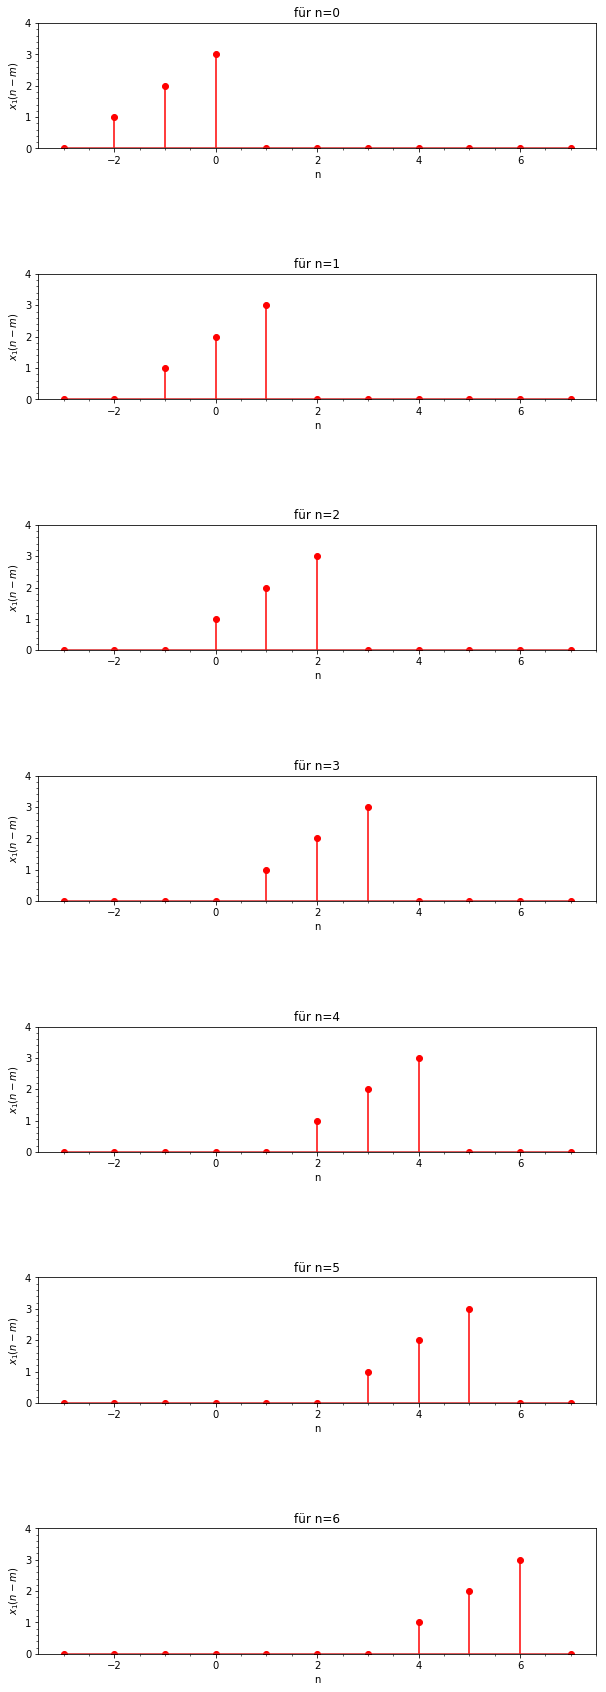

In [6]:
plt.figure(figsize=(10,30))
plt.subplot(711)
m=4
x_1_nm=np.flipud(x_1_m)
x_1_nm=np.roll(x_1_nm,-m)
plt.stem(n,x_1_nm,'r',markerfmt='ro')
plt.title("für n=0")
plt.ylabel("$x_1(n-m)$")
plt.xlabel("n")
plt.minorticks_on()
plt.ylim(0,4);
for i in range(1,7):
    plt.subplot(7,1,i+1)
    plt.minorticks_on()
    plt.subplots_adjust(hspace=1)
    plt.stem(n,np.roll(x_1_nm,i),'r',markerfmt='ro')
    plt.ylabel("$x_1(n-m)$")
    plt.xlabel("n")
    plt.title("für n=%i"%i)
    plt.ylim(0,4)
    

### 2.3 Darstellung der Faltung

Welche Werte für x3 werden erwartet?

Geometrischer Ansatz:

* bis n=0: <b>0 </b>           (keine Überlappung)

* bei n=0: <b>6</b> ,(2*3 =>Beginn der Überlappung der Flächen)

* bei n=1: <b>10</b> ,(6+2*2)

* bei n=2: <b>12</b> ,(10+2*1)

* bei n=3: <b>12</b> ,(keine Änderung der Gesamtfläche)

* bei n=4: <b>6</b> ,(12-2*3 => die Fläche von x1 verlässt x2)

* bei n=5: <b>2</b> ,(6-2*2)

* bei n=6: <b>0</b> ,(die Flächen überlappen nicht mehr)

#### Plot der 3 Funtionen bis n=6:

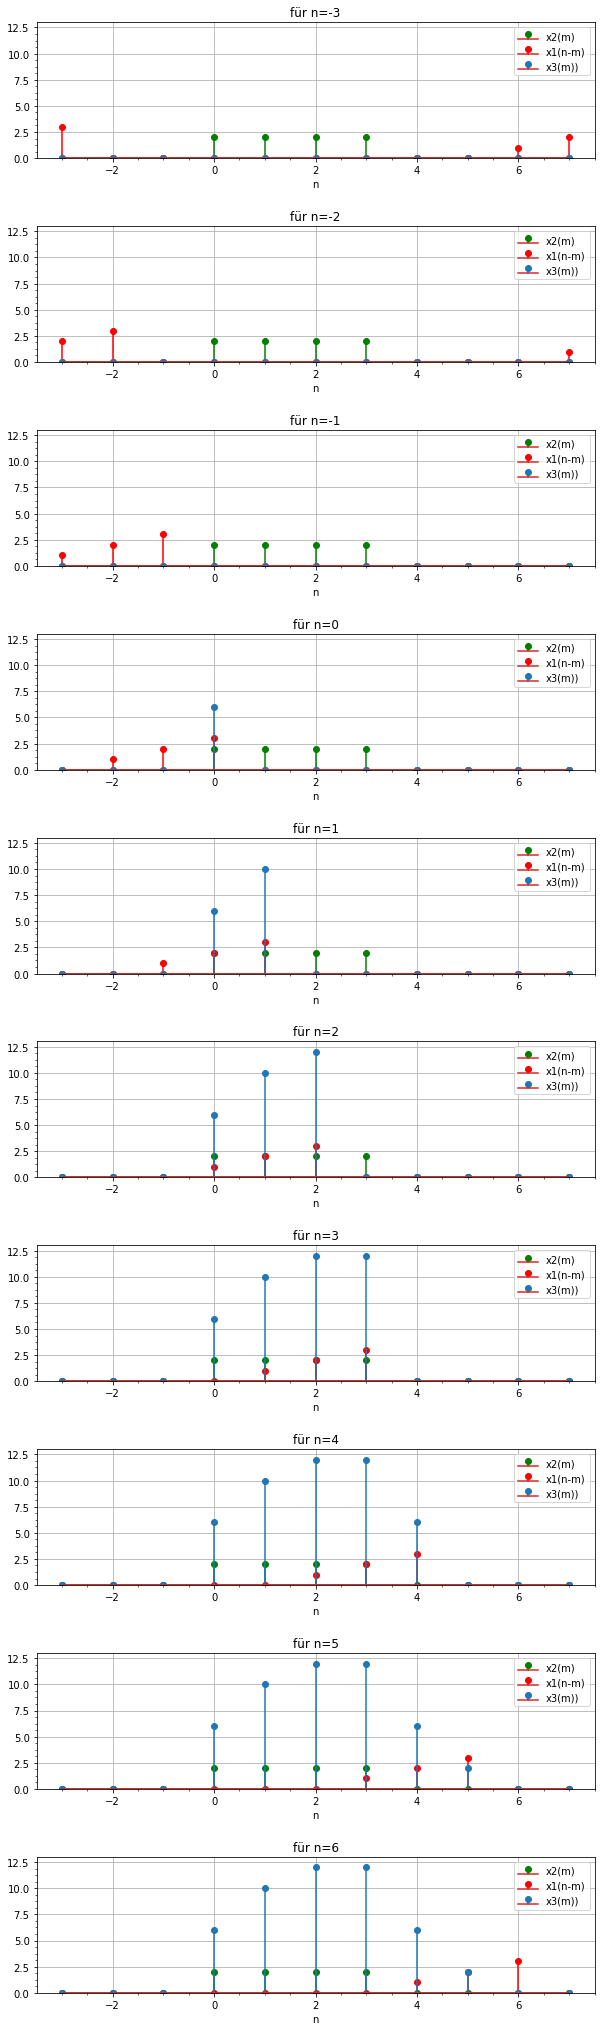

In [49]:
plt.figure(figsize=(10,40))
x3_m=np.zeros(n.size)
L=n[-1]
for k in range (n[0],L):
    plt.subplot(n.size,1,k+4)
    plt.minorticks_on()
    plt.grid(True)
    plt.subplots_adjust(hspace=0.5)
    plt.stem(n,x_2_m,'green',markerfmt='go',label="x2(m)")
    plt.stem(n,np.roll(x_1_nm,k),'r',markerfmt='ro',label="x1(n-m)")
    x3_m[k-n[0]]=np.roll(x_1_nm,k).transpose()@x_2_m
    plt.stem(n,x3_m,label="x3(m))")
    plt.xlabel("n")
    plt.title("für n=%i"%k)
    plt.legend()
    plt.ylim(0,13)

Der finale Graph von x3(m) entspricht den geometrisch ermittelten Werten.

#### Vergleich mit der "convolve" Methode:

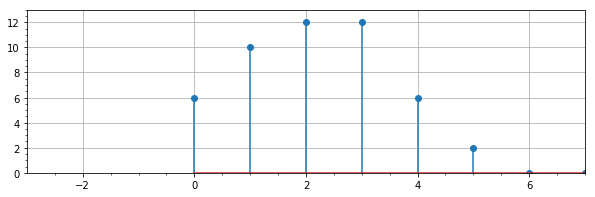

In [42]:
plt.figure(figsize=(10,3))
plt.stem(np.convolve(x_1,x_2))
plt.minorticks_on()
plt.grid(True)
plt.xlim(-3,7)
plt.ylim(0,13);

Die Numpy-Version stimmt mit der "händischen" Faltung überein.